In [1]:
import numpy as np
data_synthesized = np.load("data_synthesized.npy", allow_pickle=True).item()
embeddings = np.load("embeddings.npy", allow_pickle=True).item()
isomap_rs = np.load("isomap_rs.npy", allow_pickle=True).item()
scores_emb = np.load("scores_emb_dict.npy", allow_pickle=True).item()

In [2]:
embeddings.keys()

dict_keys(['base', 'Open-$L^3$', 'BYOL', 'CREPE', 'Wav2vec2', 'GURA', 'YAMNet'])

In [3]:
X = data_synthesized['X']
Theta = data_synthesized['Theta']

Codes for plotting isomap and relative scores:

In [4]:
import matplotlib.pyplot as plt

def set_axes_equal(ax):
    '''Make axes of 3D plot have equal scale so that spheres appear as spheres,
    cubes as cubes, etc..  This is one possible solution to Matplotlib's
    ax.set_aspect('equal') and ax.axis('equal') not working for 3D.
    '''

    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = np.mean(z_limits)

    # The plot bounding box is a sphere in the sense of the infinity
    # norm, hence I call half the max range the plot radius.
    plot_radius = 0.5*max([x_range, y_range, z_range])

    ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius])
    ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
    ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])

def plot_3d_scatter_from_isomap(isomap_rs, y, params, s):
    # TODO: change the parameters of plotting
    for emb_name in isomap_rs.keys():
        emb_iso = isomap_rs[emb_name]
        print("----Results of " + str(emb_name) + " embeddings-----")
        fig = plt.figure(figsize=plt.figaspect(0.3))
        # one line 3 plots for one embedding model
        for i in range(y.shape[1]):
            ax = fig.add_subplot(1, 3, i+1, projection="3d")
            if i == y.shape[1]-1:
                ax.zaxis.set_label_position("bottom")
                ax.set_zlabel(emb_name, fontsize=20, rotation=90)
            ax.scatter(emb_iso[:, 0], emb_iso[:, 1], emb_iso[:, 2], 
                       s=s, c=y[:,i], cmap='coolwarm')
            ax.set_title(params[i], fontsize=30)
            # hide labels for three axises
            ax.set_xticklabels([])
            ax.set_yticklabels([])
            ax.set_zticklabels([])
            # make three axis at the same scale
            set_axes_equal(ax)
        plt.savefig(str(emb_name) + "_visualization.pdf", format="pdf", bbox_inches="tight")
        plt.show()
    

In [5]:
Params_raw = [r'$f_1$', r'$\alpha$', r'$r$']

----Results of base embeddings-----


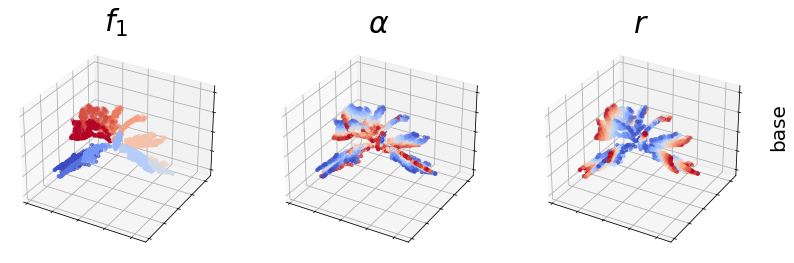

----Results of Open-$L^3$ embeddings-----


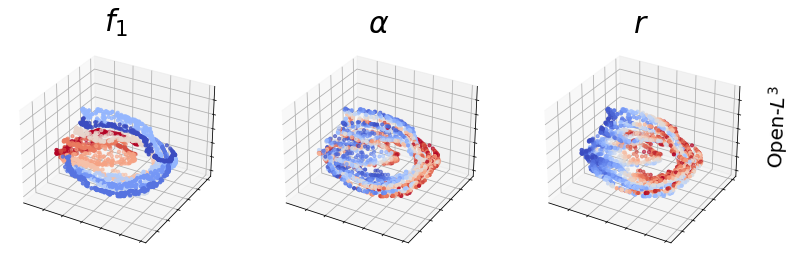

----Results of BYOL embeddings-----


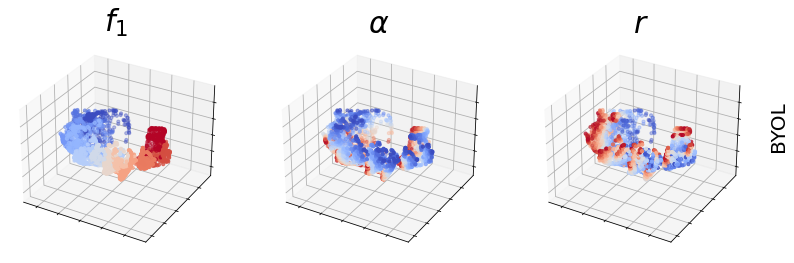

----Results of CREPE embeddings-----


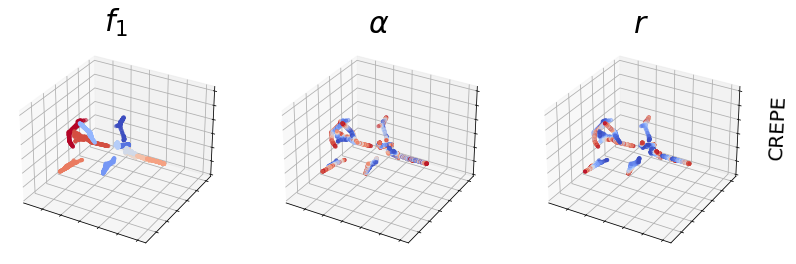

----Results of Wav2vec2 embeddings-----


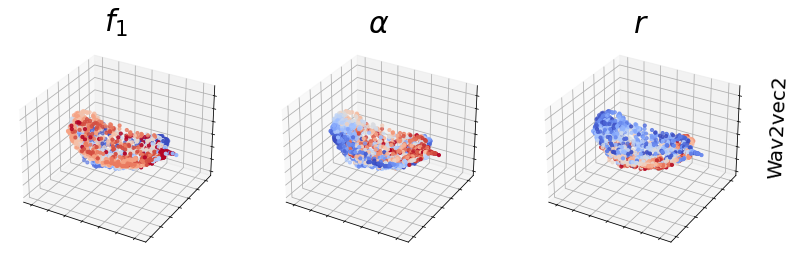

----Results of GURA embeddings-----


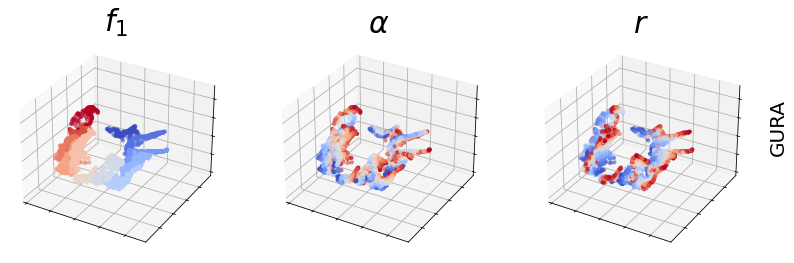

----Results of YAMNet embeddings-----


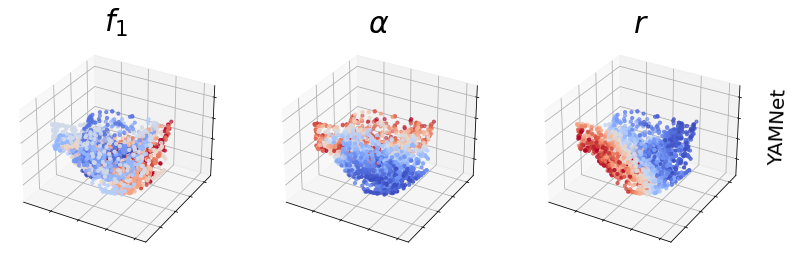

In [6]:
plot_3d_scatter_from_isomap(isomap_rs, Theta, Params_raw, s=10)

In [7]:
def plot_score(scores, y, models, params):
    '''
    plot scores of different models in one subplot

    Parameters:
    -----------
    scores: dict of relative scores corresponding to all the models in embeddings
                 with keys as names of params, and values as array with shape 
                 (n_models, n_samples)
    models: list of names of models
    '''
    # generate points aroung 1, 2, 3, 4 and so on
    visual_scores = [3, 2, 1, 1/2, 1/3]
    visual_texts = ["3", "2", "1", "1/2", "1/3"]
    names = []
    for i in range(len(models)):
        # with lenth 0.1
        bar_len = 0.3
        names += list(np.random.uniform(low=i+1-bar_len/2, high=i+1+bar_len/2,\
                    size=(y.shape[0],))) # [i] * y.shape[0]

    # TODO: change plot parameters
    index = 0
    for param_name in scores.keys():
        plt.figure()
        plt.scatter(scores[param_name], names,  c=names,
                    cmap='rainbow', s=0.3)
        plt.yticks([i+1 for i in range(len(models))], models, fontsize=20)
        plt.xticks(fontsize=20)
        # plt.ylabel("embedding models", fontsize=20)
        plt.xlabel("relative score", fontsize=20)
        # using log scale for score
        plt.xscale("function", functions=
                   (lambda x: np.log10(x), lambda x: np.power(10, x))) 
        # only 'ticks' after 'scale' make sense
        plt.xticks(visual_scores, visual_texts)
        plt.xlim([1/3, 3])
        # add dotted grid
        plt.grid(linestyle="--")
        plt.title("Scores for param " 
                  + params[index], fontsize=25)
        # invert y axis to be the same order as 3d visualization
        plt.gca().invert_yaxis() 
        plt.savefig(param_name + "_scores.pdf", format="pdf", bbox_inches="tight")
        index += 1

/var/folders/rz/zx876pv95_39jqfx9hwszfq00000gn/T/ipykernel_17560/3928330143.py:34: RuntimeWarning: divide by zero encountered in log10
  (lambda x: np.log10(x), lambda x: np.power(10, x)))
/var/folders/rz/zx876pv95_39jqfx9hwszfq00000gn/T/ipykernel_17560/3928330143.py:34: RuntimeWarning: divide by zero encountered in log10
  (lambda x: np.log10(x), lambda x: np.power(10, x)))
/var/folders/rz/zx876pv95_39jqfx9hwszfq00000gn/T/ipykernel_17560/3928330143.py:34: RuntimeWarning: divide by zero encountered in log10
  (lambda x: np.log10(x), lambda x: np.power(10, x)))
/var/folders/rz/zx876pv95_39jqfx9hwszfq00000gn/T/ipykernel_17560/3928330143.py:34: RuntimeWarning: divide by zero encountered in log10
  (lambda x: np.log10(x), lambda x: np.power(10, x)))


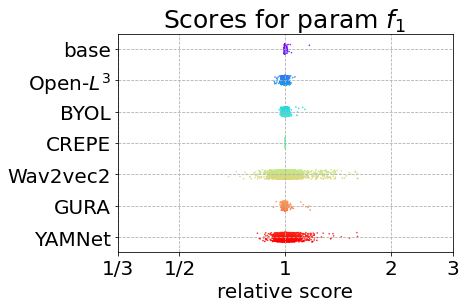

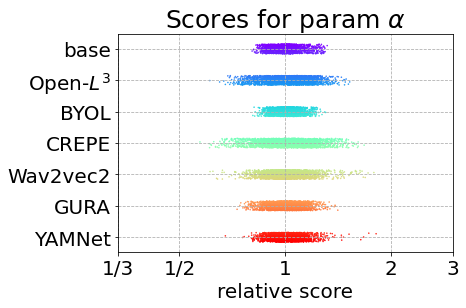

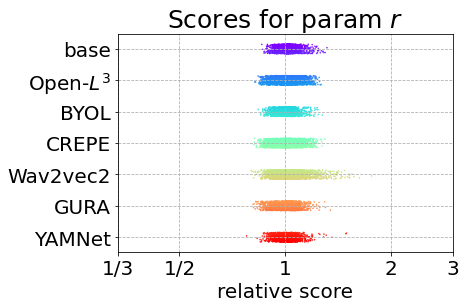

In [8]:
plot_score(scores_emb, Theta, list(embeddings.keys()), Params_raw)

In [9]:
Theta.reshape(1, 50, 50, -1)[0, 0, 0]

array([17.,  1.,  1.])

In [10]:
Theta.reshape(1, 50, 50, -1)[0, 1, 0]

array([14.  ,  1.04,  1.  ])

In [11]:
Theta.reshape(1, 50, 50, -1)[0, 2, 0]

array([13.  ,  1.08,  1.  ])

In [12]:
from scipy.fft import fft

def plot_sampled_signal(X, Theta, N_sample, n_f1, n_alpha, n_r,
            fig_size=(10, 10), font_size = 18):
    '''
    uniformly sample data and plot each original signal, fourier transform and
    fourier transform in three subplots respectively
    
    Parameters:
    ---
    X: data with shape (num_signals, len(signal))
    Theta: parameters theta with shape (num_signals, 3)
    N_sample: int value, number of samples shown in each plot
    
    '''
    # align X and Theta with shape(1, 50, 50, -1)
    X_aligned = X.reshape(n_f1, n_alpha, n_r, -1)
    Theta_aligned = Theta.reshape(n_f1, n_alpha, n_r, -1)

    # calculate number of rows and columns of subplots
    # to make it looks similar to a square plot
    n_row = int(np.ceil(np.sqrt(N_sample)))
    n_col = int(np.ceil(N_sample / n_row))
    # calculate gap between each sampled signal
    n_step_row = int(np.floor(X_aligned.shape[1] / n_row))
    n_step_col = int(np.floor(X_aligned.shape[2] / n_col))

    # original signal
    # create three subplots
    fig_sig, ax_sig = plt.subplots(n_row, n_col, sharex=True, sharey=False, 
                                   figsize=fig_size)
    # title three subplots
    # fig_sig.suptitle("Original Signal(f1, r, alpha)")
    # fig_fx.suptitle("Fourier Transform(f1, r, alpha)")
    # fig_fxlg.suptitle("Fourier Transform in Log Scale(f1, r, alpha)")

    for i in range(n_row):
        for j in range(n_col):
            x = X_aligned[0, i * n_step_row, j * n_step_col]
            theta = Theta_aligned[0, i * n_step_row, j * n_step_col]
            # hide ticks
            ax_sig[i, j].set_xticks([])
            ax_sig[i, j].set_yticks([])

            # original signal 
            ax_sig[i, j].plot(x)
            ax_sig[i, j].set_title(r"$\alpha={alpha:.2}, $r$={r:.2}$"\
                                    .format(alpha=theta[1], r=theta[2]), 
                                    fontsize=font_size)
    plt.tight_layout()
    plt.savefig("sig.pdf", format="pdf", bbox_inches="tight")

    fig_fx, ax_fx = plt.subplots(n_row, n_col, sharex=True, sharey=False, 
                                 figsize=fig_size)
    
    # Fourier
    for i in range(n_row):
        for j in range(n_col):
            x = X_aligned[0, i * n_step_row, j * n_step_col]
            theta = Theta_aligned[0, i * n_step_row, j * n_step_col]
            fx = fft(x)

            # hide ticks
            ax_fx[i, j].set_xticks([])
            ax_fx[i, j].set_yticks([])

            # Fourier tranform
            ax_fx[i, j].plot(abs(fx))
            ax_fx[i, j].set_title(r"$\alpha={alpha:.2}, $r$={r:.2}$"\
                                    .format(alpha=theta[1], r=theta[2]), 
                                    fontsize=font_size)
    plt.tight_layout()
    plt.savefig("fourier.pdf", format="pdf", bbox_inches="tight")
    
    fig_fxlg, ax_fxlg = plt.subplots(n_row, n_col, sharex=True, sharey=False, 
                                     figsize=fig_size)

    # Fourier in log scale
    for i in range(n_row):
        for j in range(n_col):
            x = X_aligned[0, i * n_step_row, j * n_step_col]
            theta = Theta_aligned[0, i * n_step_row, j * n_step_col]
            fx = fft(x)
            # Fourier transform in log scale
            # change a color for fourier to diferentiate
            ax_fxlg[i, j].plot(abs(fx), c='tab:red') 
            ax_fxlg[i, j].set_title(r"$\alpha={alpha:.2}, $r$={r:.2}$"\
                                    .format(alpha=theta[1], r=theta[2]), 
                                    fontsize=font_size)
            # hide ticks
            ax_fxlg[i, j].set_xscale("log")
            ax_fxlg[i, j].set_xticks([])
            ax_fxlg[i, j].set_yticks([])

            
    # zoom x axis
    # left, right = plt.xlim()
    # lim_range = right - left
    # new_left = left + 0.001 * lim_range
    # new_right = right - 0.8 * lim_range
    # plt.xlim([new_left, new_right])
    plt.tight_layout()
    plt.savefig("fourier_log.pdf", format="pdf", bbox_inches="tight")
    plt.show()

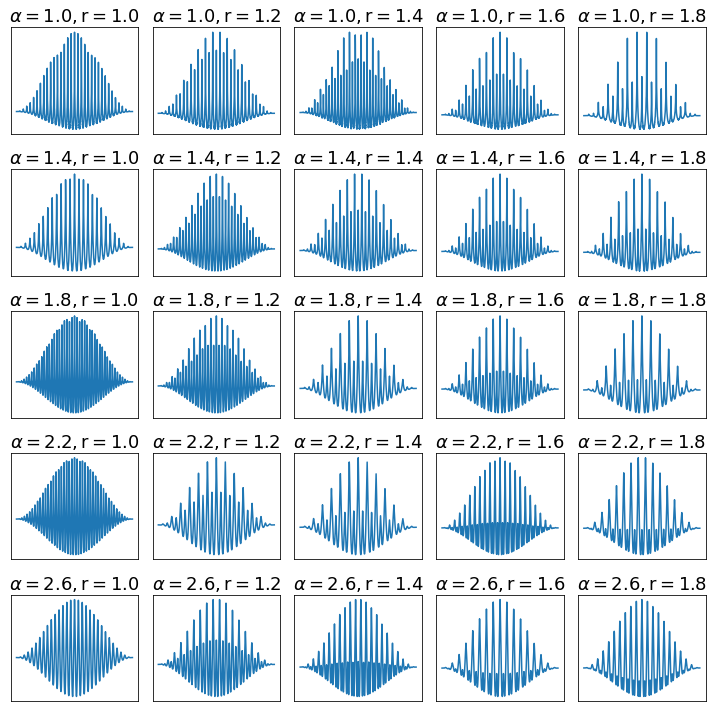

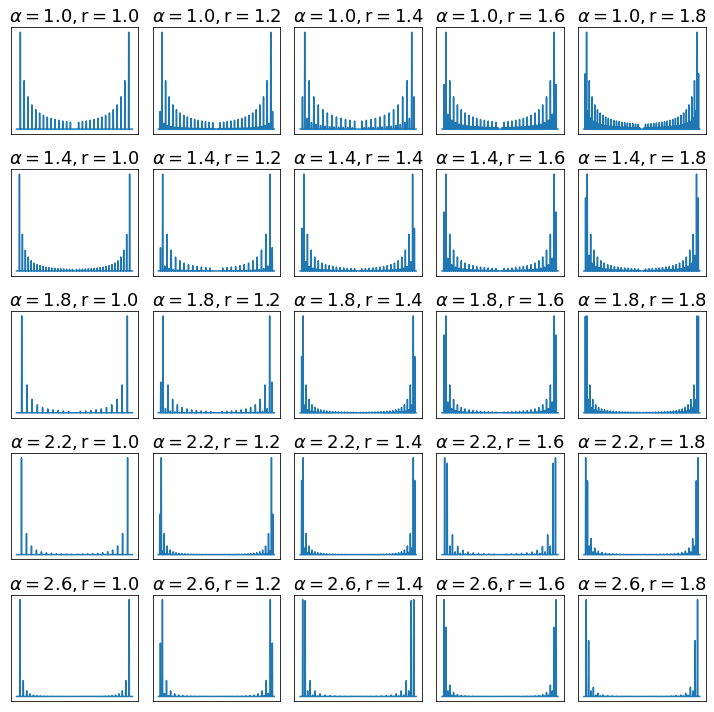

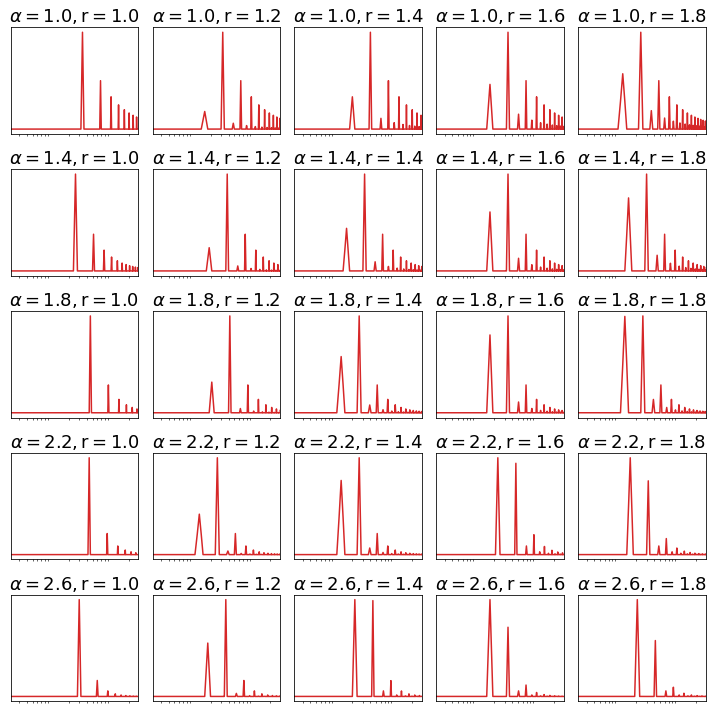

In [13]:
plot_sampled_signal(X, Theta, 25, 1, 50, 50)

In [14]:
from utils import synthesis_data
X_range, Theta_range, Params_range = synthesis_data(T=1024, n_alpha=50, n_r=50, lb_alpha=1, 
                                  ub_alpha=3, lb_r=1, ub_r=2, lb_f1=12, 
                                  ub_f1=24, random_f1=False, avoid_zero=True)
X_range.shape

100%|██████████| 30000/30000 [00:10<00:00, 2736.37it/s]


(30000, 1024)

In [15]:
Theta_range.reshape(12, 50, 50, -1)[0 , 0, 0]

array([12.,  1.,  1.])

In [16]:
Theta_range.reshape(12, 50, 50, -1)[0 , 1, 0]

array([12.  ,  1.04,  1.  ])

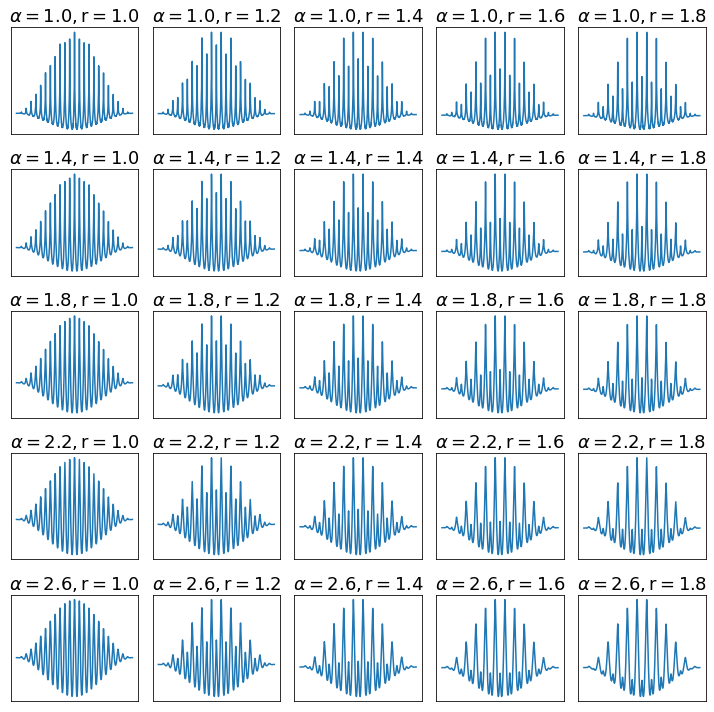

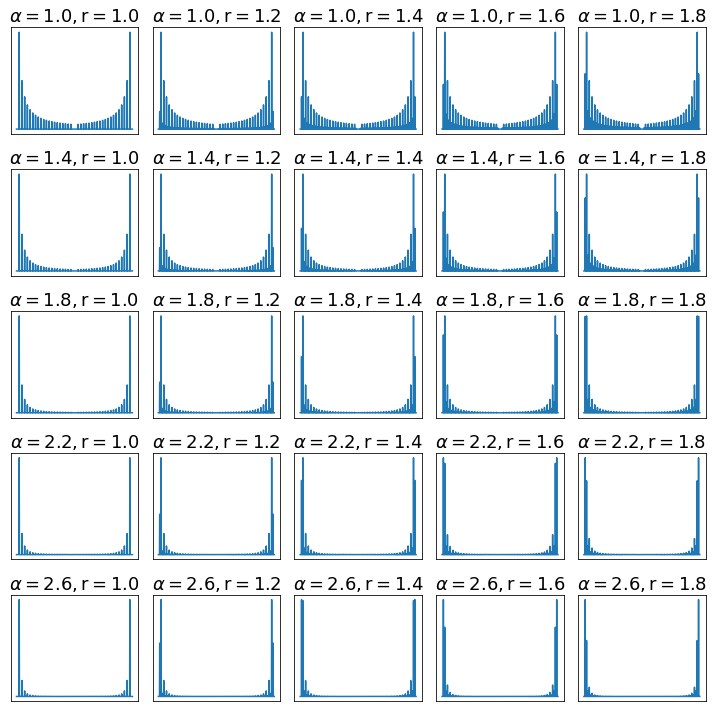

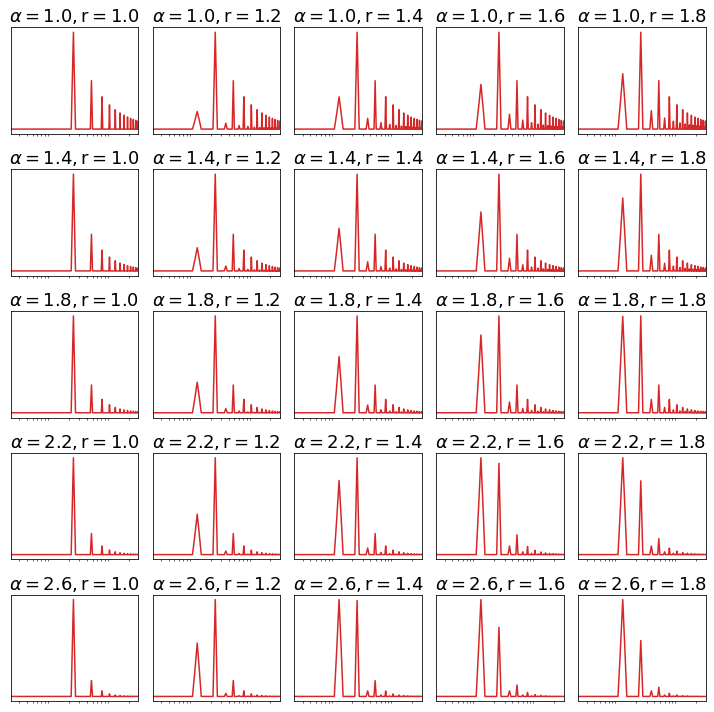

In [17]:
plot_sampled_signal(X_range, Theta_range, 25, 12, 50, 50)